<a href="https://colab.research.google.com/github/kkavyapriyanka/Keyword_verification/blob/main/KeyWordVerification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install contractions


In [247]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re, string, unicodedata
import nltk
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold,train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
wv = gensim.models.KeyedVectors.load_word2vec_format("/content/drive/MyDrive/Colab Notebooks/GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

In [209]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/keyword_verification.csv')
data.shape

(11370, 5)

In [210]:
data=data.dropna()
data.shape

(7952, 5)

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7952 entries, 2 to 11368
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7952 non-null   int64 
 1   keyword   7952 non-null   object
 2   location  7952 non-null   object
 3   text      7952 non-null   object
 4   target    7952 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 372.8+ KB


In [212]:
data.head()

,id,keyword,location,text,target
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
5,5,ablaze,OC,"If this child was Chinese, this tweet would ha...",0
6,6,ablaze,"London, England",Several houses have been set ablaze in Ngemsib...,1
7,7,ablaze,Bharat,Asansol: A BJP office in Salanpur village was ...,1


In [213]:
data['keyword'].unique()

array(['ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'bush%20fires', 'casualties', 'casualty', 'catastrophe',
       'catastrophic', 'chemical%20emergency', 'cliff%20fall', 'collapse',
       'collapsed', 'collide', 'collided', 'collision', 'crash',
       'crashed', 'crush', 'crushed', 'curfew', 'cyclone', 'damage',
       'danger', 'dead', 'death', 'deaths', 'debris', 'deluge', 'deluged',
       'demolish', 'demolished', 'demolition', 'derail', 'derailed',
       'derailment', 'desol

In [214]:
data['keyword'] = [i.replace('%20', '_') for i in data['keyword']]
data['keyword'].unique()

array(['ablaze', 'accident', 'aftershock', 'airplane_accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew_up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown_up', 'body_bag', 'body_bagging', 'body_bags',
       'bomb', 'bombed', 'bombing', 'bridge_collapse',
       'buildings_burning', 'buildings_on_fire', 'burned', 'burning',
       'bush_fires', 'casualties', 'casualty', 'catastrophe',
       'catastrophic', 'chemical_emergency', 'cliff_fall', 'collapse',
       'collapsed', 'collide', 'collided', 'collision', 'crash',
       'crashed', 'crush', 'crushed', 'curfew', 'cyclone', 'damage',
       'danger', 'dead', 'death', 'deaths', 'debris', 'deluge', 'deluged',
       'demolish', 'demolished', 'demolition', 'derail', 'derailed',
       'derailment', 'desolate', 'desolation', 'destr

In [215]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def normalize(words):
    words = remove_non_ascii(words)
    # words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words

def preprocess(sample):
    sample = remove_URL(sample)
    sample = replace_contractions(sample)
    sample=remove_emoji(sample)
    words = nltk.word_tokenize(sample)
    text=normalize(words)
    return " ".join(text)


words="❤️❤️❤️ he gave us everything. He had a horri"
words = preprocess(words)
print(words)

gave us everything He horri


In [216]:
data['clean_text']=data['text'].apply(preprocess)

In [217]:
data['clean_text'].head()

2                 Arsonist sets cars ablaze dealership
3                 Arsonist sets cars ablaze dealership
5    If child Chinese tweet would gone viral Social...
6    Several houses set ablaze Ngemsibaa village Ok...
7    Asansol A BJP office Salanpur village set abla...
Name: clean_text, dtype: object

In [218]:
print(data.duplicated().unique())
print(data.duplicated(subset=['clean_text']).unique())
data=data.drop_duplicates(subset=['clean_text'], keep='last')
data.head()

[False]
[False  True]


,id,keyword,location,text,target,clean_text
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,Arsonist sets cars ablaze dealership
5,5,ablaze,OC,"If this child was Chinese, this tweet would ha...",0,If child Chinese tweet would gone viral Social...
6,6,ablaze,"London, England",Several houses have been set ablaze in Ngemsib...,1,Several houses set ablaze Ngemsibaa village Ok...
7,7,ablaze,Bharat,Asansol: A BJP office in Salanpur village was ...,1,Asansol A BJP office Salanpur village set abla...
8,8,ablaze,"Accra, Ghana","National Security Minister, Kan Dapaah's side ...",0,National Security Minister Kan Dapaah side chi...


In [231]:
data['corpus']=data['keyword']+' '+data['clean_text']
X = data['corpus']
Y=data['target']
X.shape,Y.shape

((7640,), (7640,))

(6112,) (6112,) (1528,) (1528,)
For 1 fold 81.54450261780106
(6112,) (6112,) (1528,) (1528,)
For 2 fold 81.54450261780106
(6112,) (6112,) (1528,) (1528,)
For 3 fold 81.54450261780106
(6112,) (6112,) (1528,) (1528,)
For 4 fold 81.54450261780106
(6112,) (6112,) (1528,) (1528,)
For 5 fold 81.60994764397905


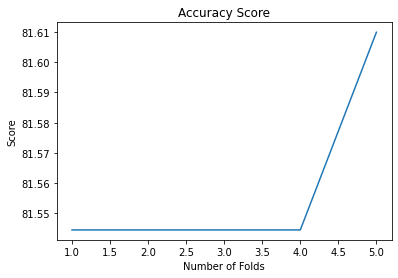

In [259]:
skfold=StratifiedKFold(n_splits=5,shuffle=True)
i=1
score_vals=[]
for trainindex,testindex in skfold.split(X,Y):
#     print(X[2966])
    xtr,xcv=X.iloc[trainindex],X.iloc[testindex]
    ytr,ycv=Y.iloc[trainindex],Y.iloc[testindex]
    print(xtr.shape,ytr.shape,xcv.shape,ycv.shape)
    tfidf=TfidfVectorizer()
    xtr=tfidf.fit_transform(xtr.values)
    xcv=tfidf.transform(xcv.values)
    nbs=BernoulliNB(alpha=10)
    nbs.fit(xtr,ytr)
    pred=nbs.predict(xcv)
    score=accuracy_score(ycv,pred)*100 
    print(f"For {i} fold {score}")
    score_vals.append(score)
    i+=1
plt.plot([1,2,3,4,5],score_vals)
plt.xlabel("Number of Folds") # Text for X-Axis
plt.ylabel("Score") # Text for Y-Axis
plt.title("Accuracy Score")
plt.show()

In [199]:

def word_averaging(words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(text_list):
    return np.vstack([word_averaging(post) for post in text_list ])

In [226]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
w_clean_text = data['clean_text'].apply(w2v_tokenize_text)
w_keyword = data['keyword'].apply(w2v_tokenize_text)

wd_clean_text = word_averaging_list(w_clean_text)
wd_keyword = word_averaging_list(w_keyword)

# data['wd_keyword'] = data['w_keyword'].apply(word_averaging_list)
# data.head()
# X_train_word_average = word_averaging_list(train_tokenized)
# X_test_word_average = word_averaging_list(test_tokenized)

In [260]:
skfold=StratifiedKFold(n_splits=5,shuffle=True)
i=1
score_vals=[]
for trainindex,testindex in skfold.split(X,Y):
#     print(X[2966])
    xtr,xcv=X.iloc[trainindex],X.iloc[testindex]
    ytr,ycv=Y.iloc[trainindex],Y.iloc[testindex]
    print(xtr.shape,ytr.shape,xcv.shape,ycv.shape,xtr.values[0])
    xcv_tokenized = xcv.apply(w2v_tokenize_text)
    xtr_tokenized = xtr.apply(w2v_tokenize_text)
    Xtr_word_average = word_averaging_list(xtr_tokenized)
    Xcv_word_average = word_averaging_list(xcv_tokenized)
    params={'alpha':[10,100,20,30,40,50]}
    rndm=RandomizedSearchCV(BernoulliNB(),params,cv=3,scoring="f1")
    rndm.fit(Xtr_word_average,ytr)
    nbs=BernoulliNB(alpha=rndm.best_params_['alpha'])
    nbs.fit(Xtr_word_average,ytr)
    pred=nbs.predict(Xcv_word_average)
    score=accuracy_score(ycv,pred)*100
    score_vals.append(score)
    print(f"For {i} fold {score}")
    i+=1

(6112,) (6112,) (1528,) (1528,) ablaze If child Chinese tweet would gone viral Social media would ablaze SNL would made racist j


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


For 1 fold 79.12303664921467
(6112,) (6112,) (1528,) (1528,) ablaze Arsonist sets cars ablaze dealership


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


For 2 fold 79.97382198952879
(6112,) (6112,) (1528,) (1528,) ablaze Arsonist sets cars ablaze dealership


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


For 3 fold 79.05759162303664
(6112,) (6112,) (1528,) (1528,) ablaze Arsonist sets cars ablaze dealership


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


For 4 fold 77.5523560209424
(6112,) (6112,) (1528,) (1528,) ablaze Arsonist sets cars ablaze dealership


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


For 5 fold 78.7303664921466


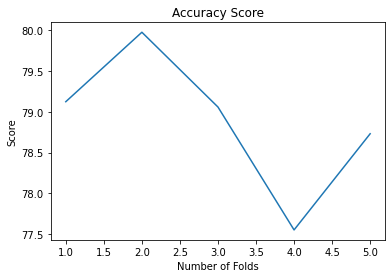

In [261]:
plt.plot([1,2,3,4,5],score_vals)
plt.xlabel("Number of Folds") # Text for X-Axis
plt.ylabel("Score") # Text for Y-Axis
plt.title("Accuracy Score")
plt.show()